<a href="https://colab.research.google.com/github/sharulms/d30-entry-/blob/main/car_price_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded=files.upload()


Saving CarPrice.csv to CarPrice.csv


In [3]:
import pandas as pd
data=pd.read_csv('CarPrice.csv')
data.head()
df=pd.DataFrame(data)
print(df)

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

1. Loading and Preprocessing
 Load the dataset and perform necessary preprocessing steps.

Preprocessing

In [4]:
# Drop rows with missing values
df.dropna(axis=0, inplace=True)

# Drop columns with missing values
df.dropna(axis=1, inplace=True)
print(df)

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

In [5]:
df.isnull()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [11]:
# One-Hot Encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# For example, if 'fuel_type' is a categorical column:
# df = pd.get_dummies(df, columns=['fuel_type'], drop_first=True)
print(df_encoded)


     car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0         1          3       88.6      168.8      64.1       48.8        2548   
1         2          3       88.6      168.8      64.1       48.8        2548   
2         3          1       94.5      171.2      65.5       52.4        2823   
3         4          2       99.8      176.6      66.2       54.3        2337   
4         5          2       99.4      176.6      66.4       54.3        2824   
..      ...        ...        ...        ...       ...        ...         ...   
200     201         -1      109.1      188.8      68.9       55.5        2952   
201     202         -1      109.1      188.8      68.8       55.5        3049   
202     203         -1      109.1      188.8      68.9       55.5        3012   
203     204         -1      109.1      188.8      68.9       55.5        3217   
204     205         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio 

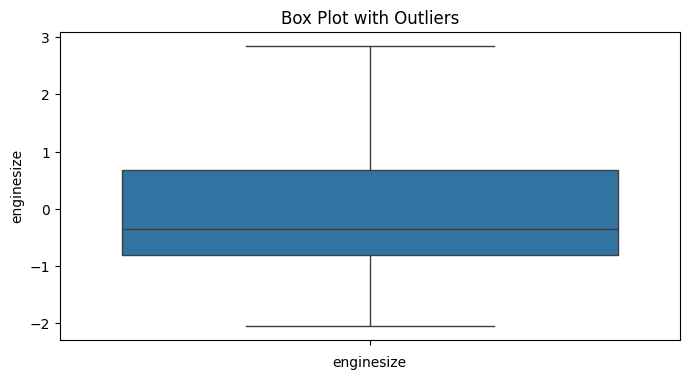

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Detecting outliers using the IQR method for a numerical column
Q1 = df['enginesize'].quantile(0.25)
Q3 = df['enginesize'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
df = df[(df['enginesize'] >= lower_bound) & (df['enginesize'] <= upper_bound)]


plt.figure(figsize=(8, 4))
sns.boxplot(data=df['enginesize'])
plt.title('Box Plot with Outliers')
plt.xlabel('enginesize')
plt.show()


In [15]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Assuming 'engine_size', 'horsepower', and 'weight' are numerical features to scale
df[['enginesize', 'horsepower', 'price']] = scaler.fit_transform(df[['enginesize', 'horsepower', 'price']])
print(df)

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

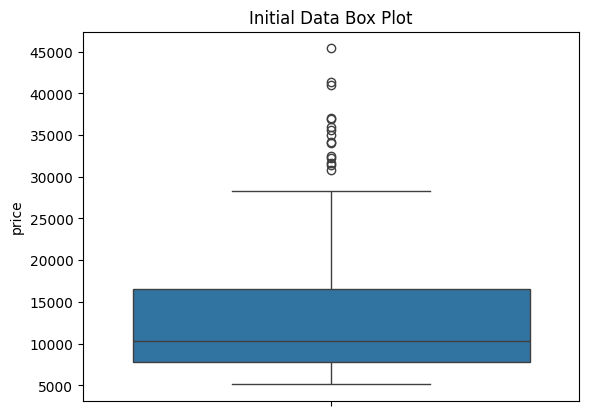

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (assuming a CSV)
df = pd.read_csv('CarPrice.csv')

# Quick data visualization
sns.boxplot(data=df['price'])
plt.title('Initial Data Box Plot')
plt.show()



Compute IQR and Remove Outliers

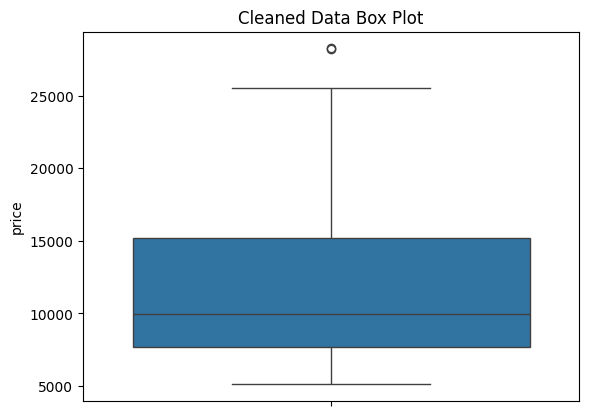

In [22]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Box plot of cleaned data
sns.boxplot(data=df_cleaned['price'])
plt.title('Cleaned Data Box Plot')
plt.show()


 Train a Machine Learning Model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select features and target variable
X = df_cleaned[['stroke','compressionratio' ]]  # Independent variables
y = df_cleaned['price']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 18960288.34536681


 Implement the following five regression algorithms:
1) Linear Regression
2) Decision Tree Regressor
3) Random Forest Regressor
4) Gradient Boosting Regressor
5) Support Vector Regressor

In [29]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


from sklearn.preprocessing import StandardScaler


In [30]:
df = pd.read_csv('CarPrice.csv')

X = df[['stroke', 'compressionratio']]
y = df['price']


Train-Test Split


In [31]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


1. Linear Regression

In [32]:

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr}, R2: {r2_lr}")


Linear Regression - MSE: 68340810.51735565, R2: 0.013618771111676642


2. Decision Tree Regressor

In [33]:

dt_model = DecisionTreeRegressor()

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree Regressor - MSE: {mse_dt}, R2: {r2_dt}")


Decision Tree Regressor - MSE: 15984192.550065894, R2: 0.7692958662479199


3. Random Forest Regressor

In [34]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regressor - MSE: {mse_rf}, R2: {r2_rf}")


Random Forest Regressor - MSE: 10817498.117465835, R2: 0.8438681513165065


4. Gradient Boosting Regressor

In [41]:

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

gb_model.fit(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting Regressor - MSE: {mse_gb}, R2: {r2_gb}")


Gradient Boosting Regressor - MSE: 14735789.434392553, R2: 0.7873144029036003


5. Support Vector Regressor

In [35]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR()

svr_model.fit(X_train_scaled, y_train)

y_pred_svr = svr_model.predict(X_test_scaled)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"Support Vector Regressor - MSE: {mse_svr}, R2: {r2_svr}")


Support Vector Regressor - MSE: 74041323.00894909, R2: -0.06865825302931139


In [42]:
print(f"""
Linear Regression    - MSE: {mse_lr}, R2: {r2_lr}
Decision Tree        - MSE: {mse_dt}, R2: {r2_dt}
Random Forest        - MSE: {mse_rf}, R2: {r2_rf}
Gradient Boosting    - MSE: {mse_gb}, R2: {r2_gb}
Support Vector       - MSE: {mse_svr}, R2: {r2_svr}
""")



Linear Regression    - MSE: 68340810.51735565, R2: 0.013618771111676642
Decision Tree        - MSE: 15984192.550065894, R2: 0.7692958662479199
Random Forest        - MSE: 10817498.117465835, R2: 0.8438681513165065
Gradient Boosting    - MSE: 14735789.434392553, R2: 0.7873144029036003
Support Vector       - MSE: 74041323.00894909, R2: -0.06865825302931139



. Model Evaluation

Compare the performance of all the models based on R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE).
Identify the best performing model and justify why it is the best.

In [43]:
from sklearn.metrics import mean_absolute_error

def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MSE: {mse}, MAE: {mae}, R²: {r2}")
    return {'Model': model_name, 'MSE': mse, 'MAE': mae, 'R²': r2}


results = []


y_pred_lr = lr_model.predict(X_test)
results.append(evaluate_model(y_test, y_pred_lr, 'Linear Regression'))


y_pred_dt = dt_model.predict(X_test)
results.append(evaluate_model(y_test, y_pred_dt, 'Decision Tree'))


y_pred_rf = rf_model.predict(X_test)
results.append(evaluate_model(y_test, y_pred_rf, 'Random Forest'))

y_pred_gb = gb_model.predict(X_test)
results.append(evaluate_model(y_test, y_pred_gb, 'Gradient Boosting'))


y_pred_svr = svr_model.predict(X_test_scaled)
results.append(evaluate_model(y_test, y_pred_svr, 'Support Vector Regressor'))


results_df = pd.DataFrame(results)
print(results_df)


Linear Regression - MSE: 68340810.51735565, MAE: 6046.764463208273, R²: 0.013618771111676642
Decision Tree - MSE: 15984192.550065894, MAE: 2595.7924400921656, R²: 0.7692958662479199
Random Forest - MSE: 10817498.117465835, MAE: 2356.7144736359733, R²: 0.8438681513165065
Gradient Boosting - MSE: 14735789.434392553, MAE: 2568.6637840780163, R²: 0.7873144029036003
Support Vector Regressor - MSE: 74041323.00894909, MAE: 5471.385987278386, R²: -0.06865825302931139
                      Model           MSE          MAE        R²
0         Linear Regression  6.834081e+07  6046.764463  0.013619
1             Decision Tree  1.598419e+07  2595.792440  0.769296
2             Random Forest  1.081750e+07  2356.714474  0.843868
3         Gradient Boosting  1.473579e+07  2568.663784  0.787314
4  Support Vector Regressor  7.404132e+07  5471.385987 -0.068658


Feature Importance Analysis

Identify the significant variables affecting car prices (feature selection)

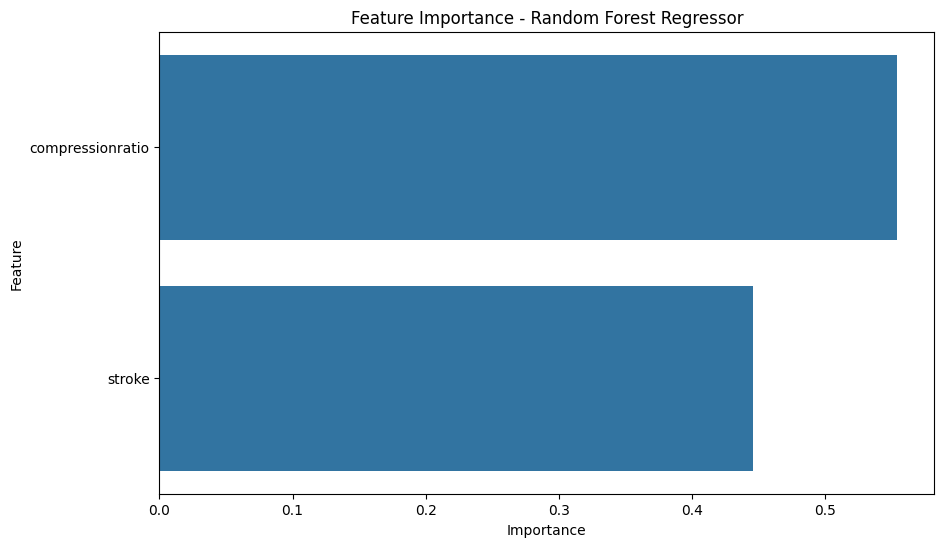

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns


feature_importance = rf_model.feature_importances_


feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest Regressor')
plt.show()


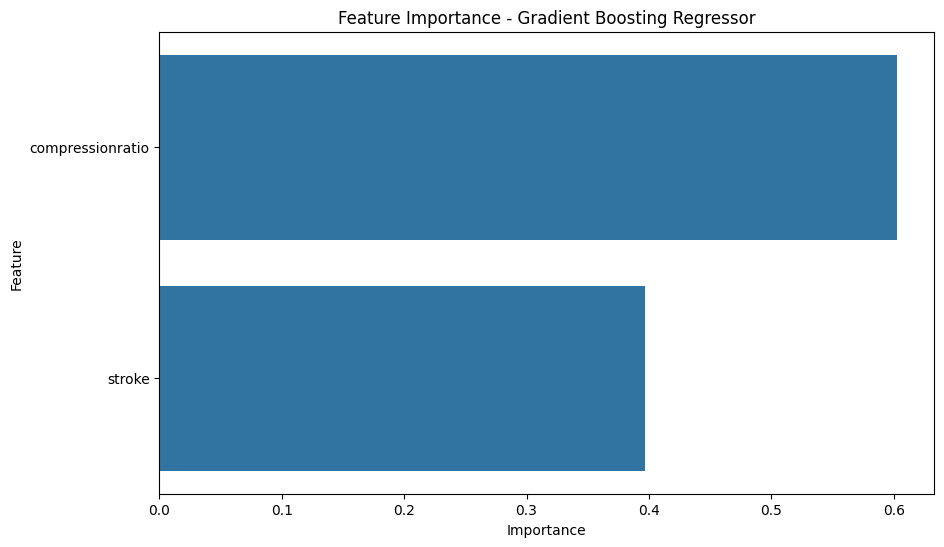

In [45]:
# Assuming gb_model is the trained Gradient Boosting Regressor
# Get feature importances
gb_feature_importance = gb_model.feature_importances_

gb_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': gb_feature_importance})


gb_feature_importance_df = gb_feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gb_feature_importance_df)
plt.title('Feature Importance - Gradient Boosting Regressor')
plt.show()


Hyperparameter Tuning

Perform hyperparameter tuning and check whether the performance of the model has increase

In [46]:
from sklearn.model_selection import RandomizedSearchCV


param_dist_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist_rf,
                                      n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

random_search_rf.fit(X_train, y_train)


print("Best Hyperparameters for Random Forest: ", random_search_rf.best_params_)


best_rf_model = random_search_rf.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test)

mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print(f"Random Forest (Tuned) - MSE: {mse_rf_tuned}, MAE: {mae_rf_tuned}, R²: {r2_rf_tuned}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters for Random Forest:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40, 'bootstrap': True}
Random Forest (Tuned) - MSE: 10817498.117465835, MAE: 2356.7144736359733, R²: 0.8438681513165065


In [47]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter space for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV for Gradient Boosting
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb,
                              cv=5, n_jobs=-1, verbose=2)

# Fit the grid search model
grid_search_gb.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters for Gradient Boosting: ", grid_search_gb.best_params_)

# Evaluate the tuned model
best_gb_model = grid_search_gb.best_estimator_
y_pred_gb_tuned = best_gb_model.predict(X_test)

mse_gb_tuned = mean_squared_error(y_test, y_pred_gb_tuned)
mae_gb_tuned = mean_absolute_error(y_test, y_pred_gb_tuned)
r2_gb_tuned = r2_score(y_test, y_pred_gb_tuned)

print(f"Gradient Boosting (Tuned) - MSE: {mse_gb_tuned}, MAE: {mae_gb_tuned}, R²: {r2_gb_tuned}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters for Gradient Boosting:  {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Gradient Boosting (Tuned) - MSE: 16586863.153726628, MAE: 2883.6315052952336, R²: 0.760597359950533


In [50]:


# tuning results
print(f"Random Forest (After Tuning) - MSE: {mse_rf_tuned}, MAE: {mae_rf_tuned}, R²: {r2_rf_tuned}")
print(f"Gradient Boosting (After Tuning) - MSE: {mse_gb_tuned}, MAE: {mae_gb_tuned}, R²: {r2_gb_tuned}")


Random Forest (After Tuning) - MSE: 10817498.117465835, MAE: 2356.7144736359733, R²: 0.8438681513165065
Gradient Boosting (After Tuning) - MSE: 16586863.153726628, MAE: 2883.6315052952336, R²: 0.760597359950533
